In [91]:
import os, sys
import numpy as np
import torch
import matplotlib.pyplot as plt
import sigpy
from sigpy.mri.samp import poisson

In [92]:
# mask = poisson(img_shape=(512, 160), accel=4)

mask = torch.from_numpy(np.load('mask_3d.npy'))#.astype('float32'))
mask.shape

torch.Size([512, 160])

In [93]:
mask = abs(mask).type(torch.uint8)

In [94]:
idx_y, idx_z = mask.shape[0] // 2, mask.shape[1] // 2

C=32
mask[idx_y-C:idx_y+C, idx_z-C:idx_z+C] = 1

# c_y, c_z = 32, 10
# mask[idx_y-c_y:idx_y+c_y, idx_z-c_z:idx_z+c_z] = 1

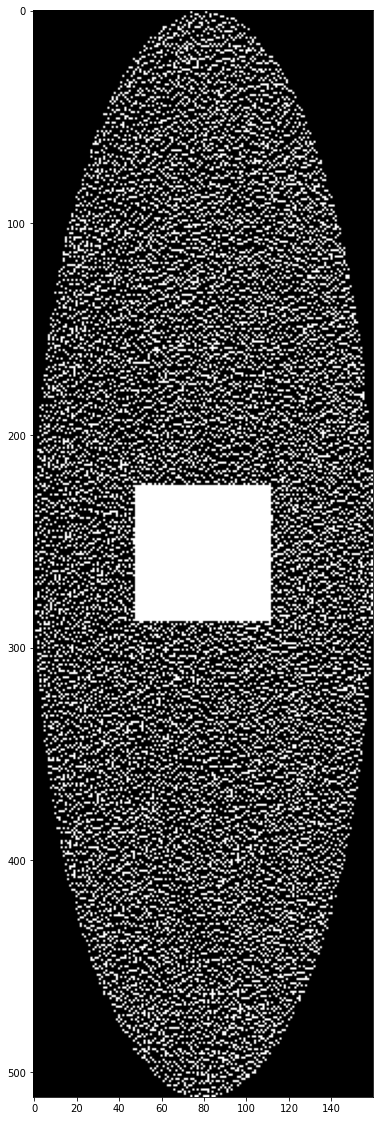

In [95]:
plt.figure(figsize=(20,20))
plt.imshow(mask, cmap='gray')
plt.show()

In [16]:
# class MaskFunc:
#     """
#     Abstract MaskFunc class for creating undersampling masks of a specified shape.
#     """

#     def __init__(self, accelerations):
#         """
#         Args:
#             accelerations (List[int]): Range of acceleration rates to simulate.
#         """
#         self.accelerations = accelerations
#         self.rng = np.random.RandomState()

#     def choose_acceleration(self):
#         """
#         Chooses a random acceleration rate given a range.
#         """
#         accel_range = self.accelerations[1] - self.accelerations[0]
#         acceleration = self.accelerations[0] + accel_range*self.rng.rand()
#         return acceleration

# class PoissonDiskMaskFunc(MaskFunc):
#     """
#     PoissonDiskMaskFunc creates a 2D Poisson disk undersampling mask.
#     """
#     def __init__(self, accelerations, calib_size):
#         super().__init__(accelerations)
#         self.calib_size = [calib_size, calib_size]

#     def __call__(self, out_shape, seed=None):
#         #self.rng.seed(seed)

#         # Design parameters for mask
#         nky = out_shape[1]
#         nkz = out_shape[2]
#         acceleration = self.choose_acceleration()

#         # Generate undersampling mask
#         mask = sigpy.mri.poisson([nky, nkz], acceleration,
#                 calib=self.calib_size,
#                 dtype=np.float32,
#                 seed=np.random.seed(seed))

#         # Reshape the mask
#         mask = torch.from_numpy(mask.reshape(out_shape))

#         return mask